In [1]:
#Import pandas library and read the csv file
import pandas as pd
path = '/yelp.csv'
df = pd.read_csv(path)

In [2]:
#Inspect the 1st row
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019000C67828>]], dtype=object)

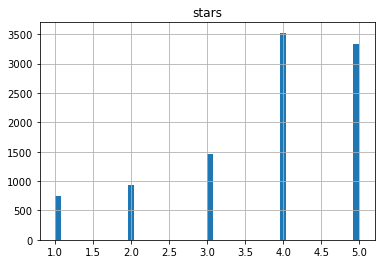

In [3]:
#Plot stars clomun to get some idea about its distribution
%matplotlib inline
df.hist(column='stars', bins=50)

In [4]:
#For binary classification filtering only the good(5 star) and bad(1 star) reviews
df_good_bad = df[(df.stars==5) | (df.stars==1)]

In [5]:
#Feature text is stored in X and response/class in y
X = df_good_bad.text
y = df_good_bad.stars

In [6]:
#Import train_test and split X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [7]:
#Import CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
#Define document term matrix using CountVectorizer
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [9]:
#Import MultinomialNB as a classification model to predict good or bad reivew
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [10]:
#Train model
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
#Predict for document term matrix of test samples
y_pred_class = nb.predict(X_test_dtm)

In [12]:
#Calculate accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.92759295499021521

In [13]:
#Generate confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[128,  61],
       [ 13, 820]])

In [14]:
#Examining the reviews that are incorrectly predicted
#Bad reviews classified as Good reviews
X_test[y_test < y_pred_class].head(10)

9351    Dr. Pierrend is ok, he will write prescription...
1227    This place was messy and loud.  The food reall...
9296    My boyfriend and I tried this place last year ...
1406    From my door, it's a five minute stroll throug...
6229    Forget the yogurt and the berry berry bad serv...
7803    I'm sad to report that we dined here for lunch...
4562    despite it's billing as the 'largest thrift st...
6977    Had to eat here with coworkers for lunch today...
5814    I do enjoy a good bowl of Pho.   This was -not...
666     I waited 45min and ended up with a tiny gross ...
Name: text, dtype: object

In [15]:
X_test[1227]

"This place was messy and loud.  The food really wasn't great and the salsa bar looked like a three year old put it together.  Overall the only plus was the tortilla chips that were free before the food.  I will not be back unless one of my friends pays for me"

In [ ]:
#Looks like the review is identified as good because of the words like free, great, plus

In [16]:
#Good reviews classified as Bad reviews
X_test[y_test > y_pred_class].head(5)

3052    When I met some friends for dinner at this res...
3999    TJ was there for me when my water heater broke...
6376       They have a mechanical bull.  Need I say more?
6512    When my youngest son graduated I took him to B...
3075                       Unfortunately Out of Business.
Name: text, dtype: object

In [17]:
X_test[6376]

'They have a mechanical bull.  Need I say more?'

In [ ]:
#Looks like the review is identified as bad because of less information.

In [18]:
#Finding the word that has highest frequency in good and bad reviews
X_train_word = vect.get_feature_names()
bad_review_word_count = nb.feature_count_[0, :]
good_review_word_count = nb.feature_count_[1, :]
words = pd.DataFrame({'word':X_train_word, 'bad_review':bad_review_word_count, 'good_review':good_review_word_count}).set_index('word')

In [19]:
#Calculate frequency of word counts
words['bad_review'] = (words.bad_review + 1)/ nb.class_count_[0]
words['good_review'] = (words.good_review + 1)/ nb.class_count_[1]
words['good_bad_ratio'] = words.good_review / words.bad_review

In [20]:
#Most influential words for good review
words.sort_values('good_bad_ratio', ascending=False).head(10)

,bad_review,good_review,good_bad_ratio
word,,,
fantastic,0.001786,0.075479,42.268371
perfect,0.003571,0.099042,27.731629
yum,0.001786,0.021965,12.300319
favorite,0.010714,0.126198,11.778488
ribs,0.001786,0.018371,10.287540
perfection,0.001786,0.018371,10.287540
amazing,0.019643,0.176518,8.986349
organic,0.001786,0.015974,8.945687
gem,0.001786,0.014776,8.274760


In [21]:
#Most influential words for bad review
words.sort_values('good_bad_ratio', ascending=True).head(10)

,bad_review,good_review,good_bad_ratio
word,,,
bouncers,0.019643,0.000399,0.020331
refused,0.017857,0.000399,0.022364
unprofessional,0.016071,0.000399,0.024849
acknowledged,0.016071,0.000399,0.024849
ugh,0.030357,0.000799,0.026311
horrible,0.133929,0.003594,0.026837
rude,0.103571,0.002796,0.026991
awful,0.073214,0.001997,0.027273
annoyed,0.014286,0.000399,0.027955


In [22]:
#Predicting the stars for review rather than only good or bad
X = df.text
y = df.stars

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [25]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [26]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
y_pred_class = nb.predict(X_test_dtm)

In [28]:
metrics.accuracy_score(y_test, y_pred_class)

0.48520000000000002

In [29]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 57,  29,  19,  71,  24],
       [ 13,  20,  30, 140,  27],
       [  2,   7,  33, 276,  31],
       [  4,   1,  18, 655, 211],
       [  1,   0,   2, 381, 448]])

In [30]:
#Accuracy based of precision, recall and f1-score
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          1       0.74      0.28      0.41       200
          2       0.35      0.09      0.14       230
          3       0.32      0.09      0.15       349
          4       0.43      0.74      0.54       889
          5       0.60      0.54      0.57       832

avg / total       0.49      0.49      0.45      2500

